----

# Hough Transfom

---

### Importing Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

### Read in the sample image and print some stats

In [2]:
image = mpimg.imread('exit-ramp.jpg')

### The original image

Original Image


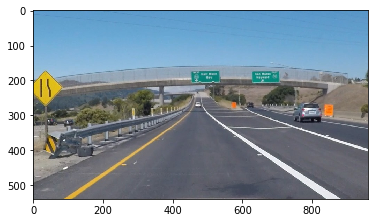

In [3]:
print('Original Image')
plt.imshow(image)
plt.show()

### Convert Image to Grayscale

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

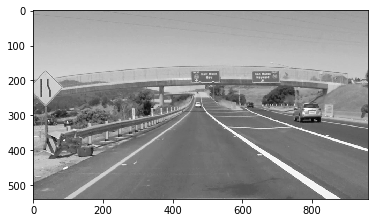

In [5]:
plt.imshow(gray, cmap='Greys_r')
plt.show()

### Gaussian blur function for suppressing noise 

In [6]:
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size), 0)

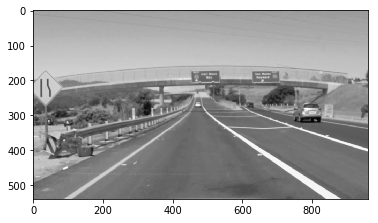

In [7]:
plt.imshow(blur_gray , cmap='Greys_r')
plt.show()

### Canny Edge Detector

In [8]:
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

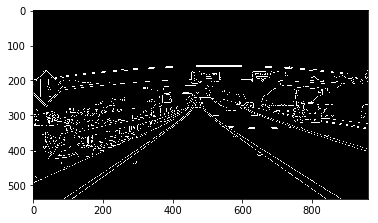

In [9]:
plt.imshow(edges, cmap='Greys_r')
plt.show()

## Filter the shaped area

In [10]:
mask = np.zeros_like(edges)   
ignore_mask_color = 255

imshape = image.shape
vertices = np.array([[(50,imshape[0]),(470, 270), (500, 270), (imshape[1],imshape[0])]], dtype=np.int32)

cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

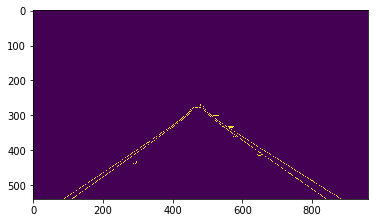

In [11]:
plt.imshow(masked_edges)
plt.show()

# HOUGH TRANSFORM

### Defining the parameters

##### Rho-Theta

In [12]:
rho = 1
theta = np.pi/180

##### Threshold - The minimum number of intersected line in the grid part
How many points in the same angle

In [13]:
threshold = 70

##### Min Line Length 
What is the distance between the start and stop point of the line

In [14]:
min_line_length = 70

##### Max Line Gap
Max Gap between the points in the same line 

In [15]:
max_line_gap = 26

### Run the hough transform

In [16]:
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

## Draw the lines on a blank image

##### Define a blank image to draw lines on

In [17]:
line_image = np.copy(image)*0

##### Draw red line between the line coordinates

In [18]:
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

In [19]:
color_edges = np.dstack((edges, edges, edges)) 

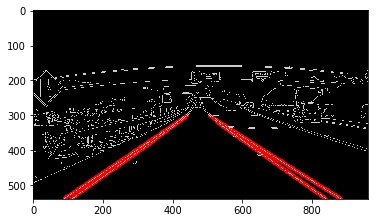

In [20]:
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(lines_edges)
plt.show()

## Apply on the original image

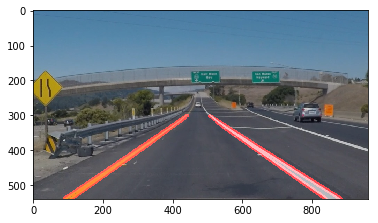

In [21]:
lines_edges = cv2.addWeighted(image, 0.8, line_image, 1, 0) 
plt.imshow(lines_edges)
plt.show()